In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../500hits.csv',encoding='latin-1')

In [5]:
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [6]:
df.drop(['PLAYER','CS'],axis=1, inplace=True)

In [7]:
df.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,0.329,1


In [8]:
df.corr()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
YRS,1.000000,0.804500,0.726805,0.519114,0.645507,0.476943,0.180773,0.271686,0.275596,0.443646,0.220438,0.151675,-0.029745,0.373235
G,0.804500,1.000000,0.947020,0.652633,0.829722,0.658190,0.130209,0.436495,0.488654,0.594580,0.412063,0.151765,-0.059923,0.402364
AB,0.726805,0.947020,1.000000,0.750055,0.919174,0.694401,0.269122,0.330510,0.369725,0.492536,0.306878,0.285416,0.052611,0.447568
R,0.519114,0.652633,0.750055,1.000000,0.822852,0.618914,0.470546,0.326315,0.204827,0.675418,0.151946,0.473194,0.379448,0.546267
H,0.645507,0.829722,0.919174,0.822852,1.000000,0.767878,0.441744,0.250107,0.317033,0.464482,0.112928,0.299625,0.435632,0.569776
2B,0.476943,0.658190,0.694401,0.618914,0.767878,1.000000,0.170483,0.432326,0.531719,0.435225,0.316729,0.007245,0.358777,0.418181
3B,0.180773,0.130209,0.269122,0.470546,0.441744,0.170483,1.000000,-0.392467,-0.421388,0.028401,-0.508560,0.496148,0.502453,0.370208
HR,0.271686,0.436495,0.330510,0.326315,0.250107,0.432326,-0.392467,1.000000,0.820956,0.503183,0.763190,-0.350574,-0.115874,0.202891
RBI,0.275596,0.488654,0.369725,0.204827,0.317033,0.531719,-0.421388,0.820956,1.000000,0.432796,0.685986,-0.466949,-0.033295,0.212778
BB,0.443646,0.594580,0.492536,0.675418,0.464482,0.435225,0.028401,0.503183,0.432796,1.000000,0.376272,0.091465,0.052411,0.355777


<Axes: >

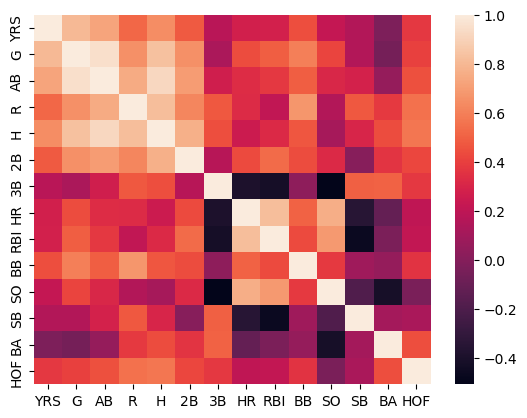

In [9]:
sns.heatmap(df.corr())

In [10]:
df['HOF'].value_counts()

HOF
0    313
1    151
2      1
Name: count, dtype: int64

In [11]:
df = df[df['HOF']!=2]

In [12]:
df['HOF'].value_counts()

HOF
0    313
1    151
Name: count, dtype: int64

In [14]:
df_0 = df[df['HOF']==0]
df_0.shape

(313, 14)

In [15]:
df_1 = df[df['HOF']==1]
df_1.shape

(151, 14)

In [16]:
df_0 = resample(df_0,n_samples=150)
df_0.shape

(150, 14)

In [17]:
df_1 = resample(df_1, n_samples=150)
df_1.shape

(150, 14)

In [18]:
df_sampled = pd.concat([df_0,df_1])

In [20]:
df_sampled.shape

(300, 14)

In [23]:
X = df_sampled.iloc[:,:-1]
y = df_sampled['HOF']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [26]:
X_train.shape

(240, 13)

In [27]:
param_grid = [
    {
        'criterion':['gini','entropy'],
        'max_depth':[5,8,10,12],
        'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,2,4],
        'splitter':['best','random'],
        'max_features':['log2','sqrt',None],
        'ccp_alpha':[0.1,0.01,0.02]
    }
]

In [30]:
gcv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, verbose=True, n_jobs=-1)

In [31]:
gcv.fit(X_train, y_train)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'ccp_alpha': [0.1, 0.01, 0.02],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 8, 10, 12],
                          'max_features': ['log2', 'sqrt', None],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'splitter': ['best', 'random']}],
             verbose=True)

In [32]:
gcv.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [33]:
best_model = gcv.best_estimator_

In [34]:
y_pred = best_model.predict(X_test)

In [35]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [38]:
a_score = accuracy_score(y_test, y_pred)
a_score

0.7666666666666667

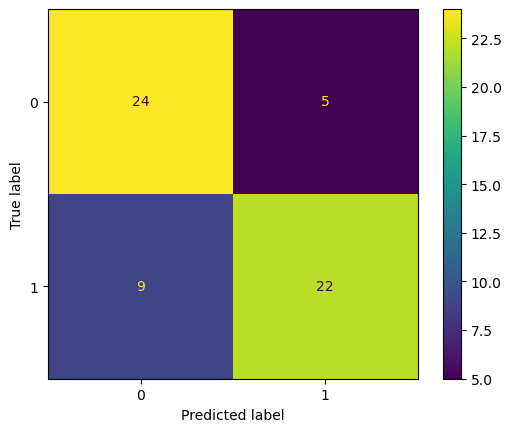

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [41]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.81      0.71      0.76        31

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



In [45]:
best_model.feature_importances_

array([0.02241588, 0.04811364, 0.23152791, 0.19721583, 0.        ,
       0.11089745, 0.05453915, 0.06222744, 0.05525119, 0.06984815,
       0.03787996, 0.00563138, 0.10445203])

In [46]:
features = pd.DataFrame(best_model.feature_importances_, X.columns)
features

,0
YRS,0.022416
G,0.048114
AB,0.231528
R,0.197216
H,0.000000
2B,0.110897
3B,0.054539
HR,0.062227
RBI,0.055251
BB,0.069848


In [48]:
best_model.classes_

array([0, 1], dtype=int64)

[Text(0.7095588235294118, 0.9583333333333334, 'AB <= 7792.755\nentropy = 1.0\nsamples = 240\nvalue = [121, 119]\nclass = Not Hall of Fame'),
 Text(0.49754901960784315, 0.875, 'SB <= 188.959\nentropy = 0.906\nsamples = 143\nvalue = [97, 46]\nclass = Not Hall of Fame'),
 Text(0.6035539215686274, 0.9166666666666667, 'True  '),
 Text(0.3284313725490196, 0.7916666666666666, '2B <= 458.449\nentropy = 0.915\nsamples = 103\nvalue = [69, 34]\nclass = Not Hall of Fame'),
 Text(0.18627450980392157, 0.7083333333333334, 'R <= 981.064\nentropy = 0.832\nsamples = 91\nvalue = [67, 24]\nclass = Not Hall of Fame'),
 Text(0.0784313725490196, 0.625, 'AB <= 6149.05\nentropy = 0.475\nsamples = 49\nvalue = [44, 5]\nclass = Not Hall of Fame'),
 Text(0.0392156862745098, 0.5416666666666666, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = Not Hall of Fame'),
 Text(0.11764705882352941, 0.5416666666666666, 'entropy = 0.592\nsamples = 35\nvalue = [30, 5]\nclass = Not Hall of Fame'),
 Text(0.29411764705882354

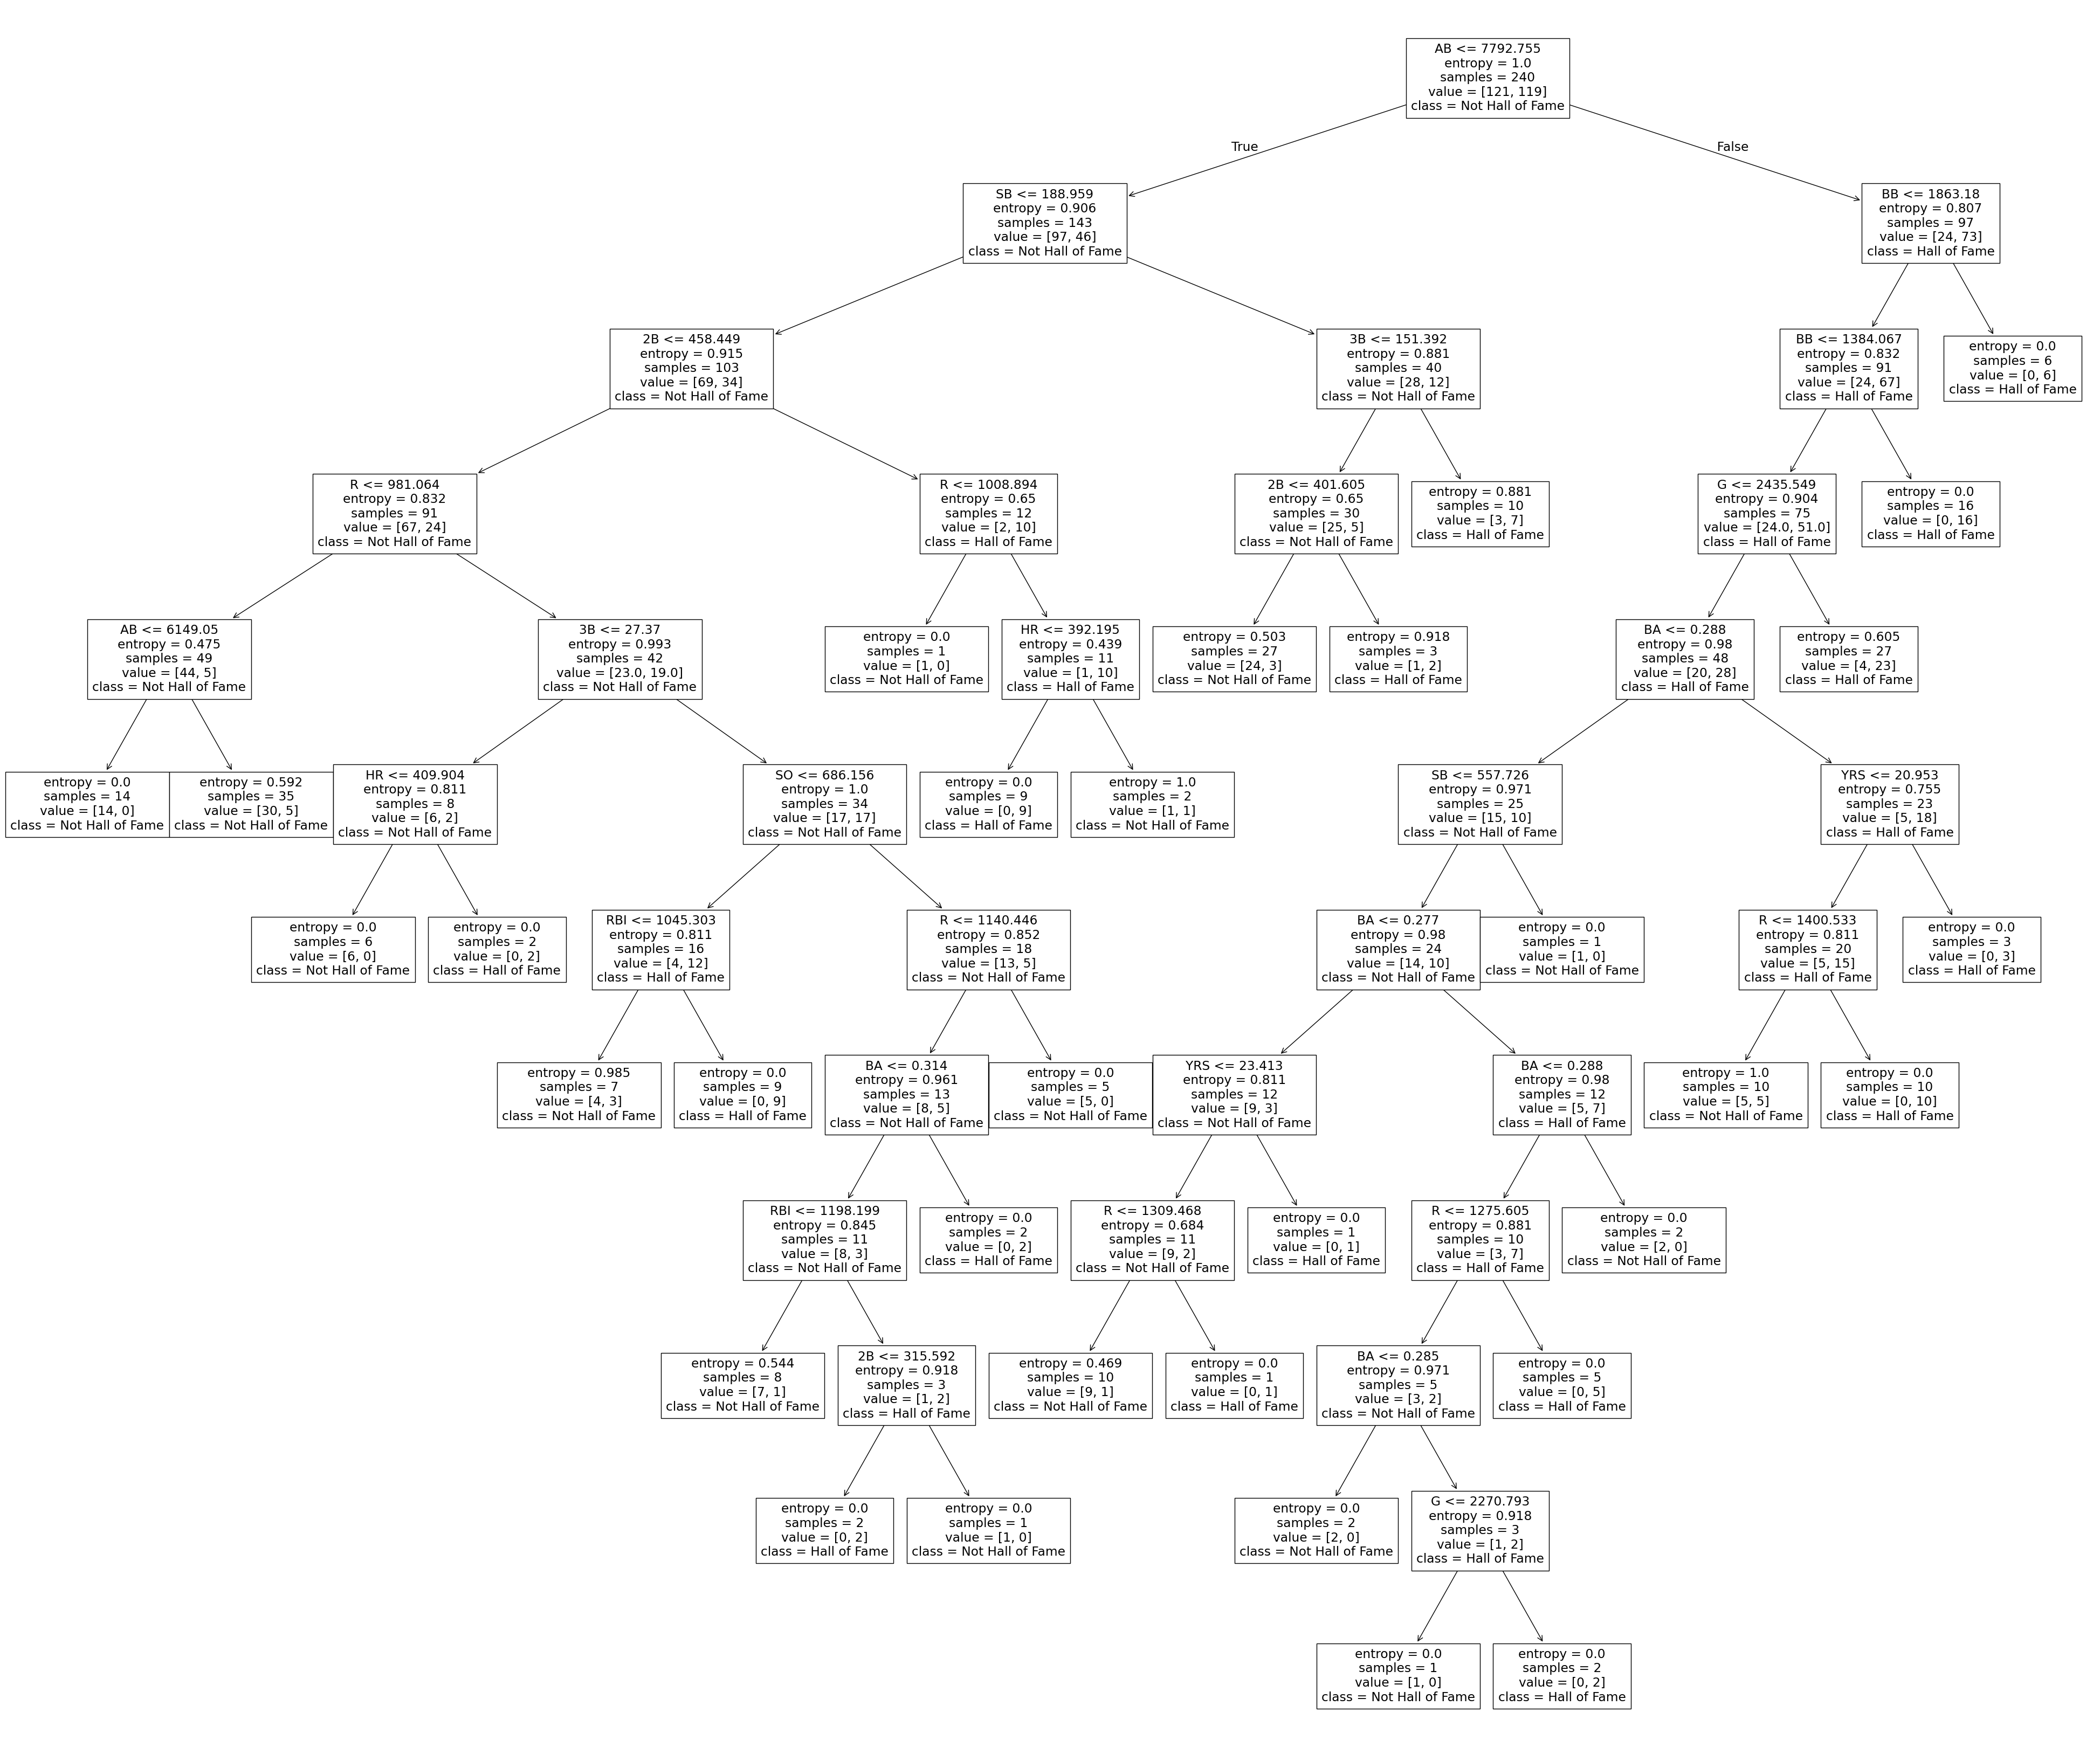

In [50]:
plt.figure(figsize=(50,42))
plot_tree(best_model, feature_names = X.columns, class_names = ["Not Hall of Fame", "Hall of Fame"])